In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json("cocktail_dataset.json")
data.set_index('id', inplace=True)
data.head()

,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
id,,,,,,,,,,
11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 11000 to 11993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          134 non-null    object
 1   category      134 non-null    object
 2   glass         134 non-null    object
 3   tags          35 non-null     object
 4   instructions  134 non-null    object
 5   imageUrl      134 non-null    object
 6   alcoholic     134 non-null    int64 
 7   createdAt     134 non-null    object
 8   updatedAt     134 non-null    object
 9   ingredients   134 non-null    object
dtypes: int64(1), object(9)
memory usage: 11.5+ KB


In [5]:
data.shape

(134, 10)

In [6]:
print(f"Liczba wierszy: {len(data)}")
print(data.describe())

Liczba wierszy: 134
       alcoholic
count      134.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0


wszystkie drinki okazują się być z alkoholem

In [7]:
# puste wartości
data.isnull().sum()

name             0
category         0
glass            0
tags            99
instructions     0
imageUrl         0
alcoholic        0
createdAt        0
updatedAt        0
ingredients      0
dtype: int64

puste wartości występują w kolumnie tags

In [8]:
tags = []
for i in data.tags:
    if i:
        for j in i:
            tags.append(j)
print(set(tags))

{'Chilli', 'Sour', 'Classic', 'Hangover', 'Christmas', 'NewEra', 'Citrus', 'USA', 'DinnerParty', 'StrongFlavor', 'Alcoholic', 'Fruity', 'Cold', 'Expensive', 'Breakfast', 'Asia', 'Dairy', 'Mild', 'Beach', 'Strong', 'Summer', 'Vegetarian', 'Vegan', 'Savory', 'IBA', 'Brunch', 'Nutty', 'ContemporaryClassic'}


większość tagów opisuje Smaki, Zawartość alkoholu, Region lub Porę picia, dodatkowo występuje tag: IBA, mówiący o weryfikacji przez International Bartenders Association, można wnioskokwać, że drinki bez tagów nie otrzymały tej certyfikacji.

[potencjalna anomalia]

Nie jest to jednak oczywiste, ponieważ możliwe, że tagi zostały usunięte i brak tagu IBA nie oznacza braku certyfikacji.
W celu weryfikacji tej hipotezy porównam nazwy drinków z kolumy data.name z tymi z oficjalnej strony IBA.

In [9]:
# oficjalne IBA
with open("official_IBA.txt", "r", encoding="utf-8") as file:
    official_IBA = file.read().splitlines()

i = 0
# weryfikuję czy tagi IBA sie zgadzają 
for _, row in data.iterrows():
    if type(row["tags"]) == list:
        if row["tags"].count("IBA") > 0:
            if row["name"] not in official_IBA:
                print("Drinki usunięte z IBA:", row["name"])
        elif row["name"] in official_IBA:
            print(row["name"], row["tags"])
            

print("Anomalie: ", i)

Drinki usunięte z IBA: Godfather
Drinki usunięte z IBA: Godmother
Drinki usunięte z IBA: Harvey Wallbanger
Drinki usunięte z IBA: Kamikaze
Drinki usunięte z IBA: Mai Tai
Anomalie:  0


Teraz jest pewność, że brak tagu IBA nie jest anomalią. Dodatkowo, został odkryty fakt, że IBA z czasem usuwa ze swoich list niektóre drinki. Na przykład Godfather, usunięty w 2020 roku.

Następnie sprawdzam czy nie ma duplikatów wśród drinków.

In [10]:
duplicates = data[data.duplicated(subset=['name'], keep=False)]

print(duplicates)

Empty DataFrame
Columns: [name, category, glass, tags, instructions, imageUrl, alcoholic, createdAt, updatedAt, ingredients]
Index: []


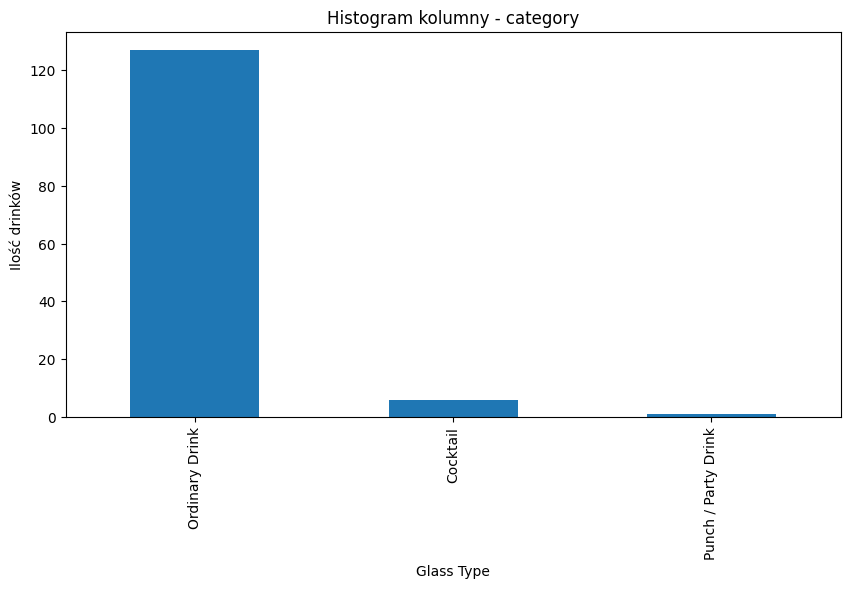

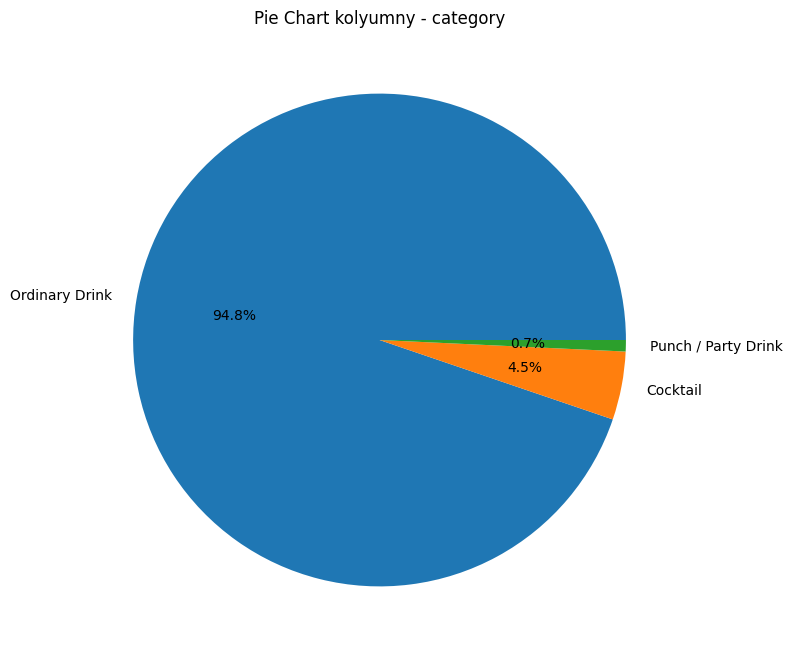

category
Ordinary Drink         127
Cocktail                 6
Punch / Party Drink      1
Name: count, dtype: int64


In [11]:
# histogram kolumny - category
plt.figure(figsize=(10, 5))
data['category'].value_counts().plot(kind='bar')
plt.title('Histogram kolumny - category')
plt.xlabel('Glass Type')
plt.ylabel('Ilość drinków')
plt.show()

plt.figure(figsize=(8, 8))
data['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart kolyumny - category')
plt.ylabel('') 
plt.show()
print(data['category'].value_counts())

Znaczna część drinków bo aż 127 z 134 należy do kategorii Ordinary Drink

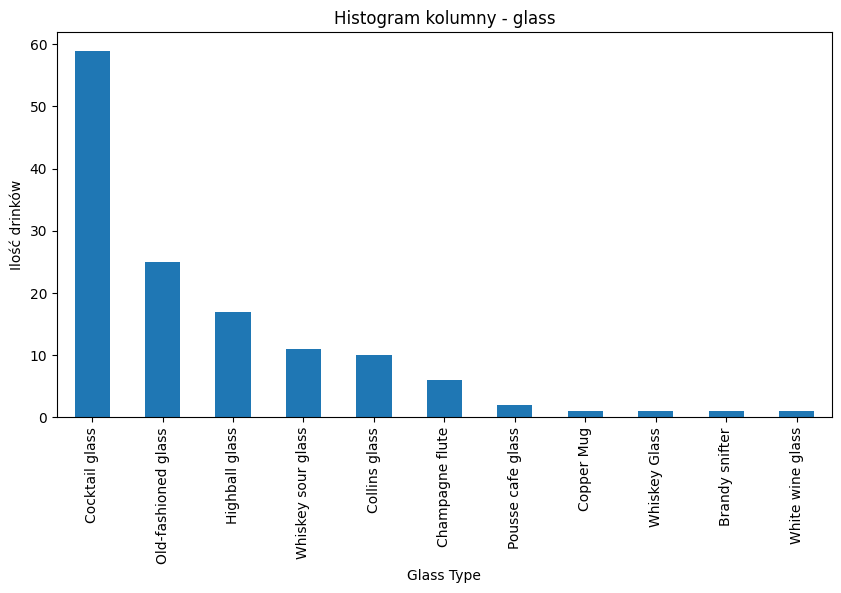

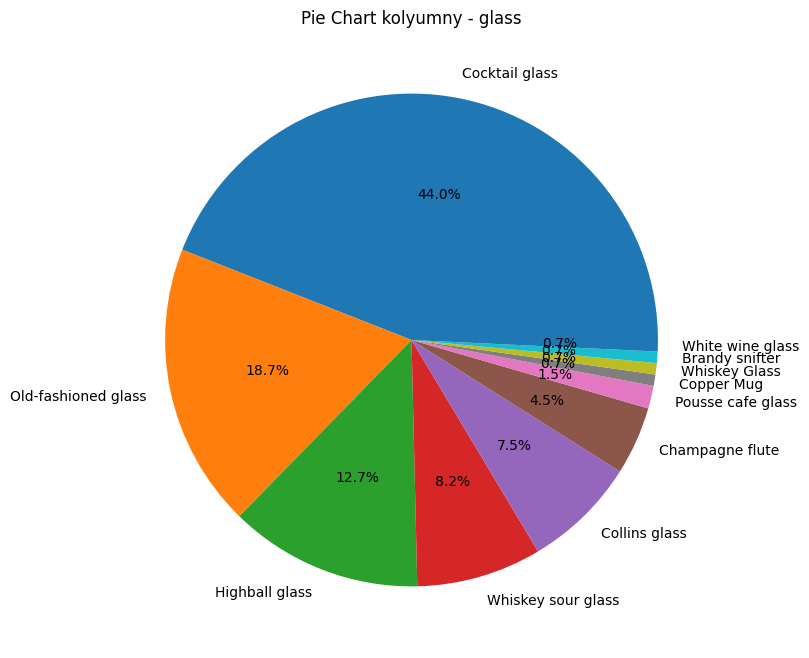

glass
Cocktail glass         59
Old-fashioned glass    25
Highball glass         17
Whiskey sour glass     11
Collins glass          10
Champagne flute         6
Pousse cafe glass       2
Copper Mug              1
Whiskey Glass           1
Brandy snifter          1
White wine glass        1
Name: count, dtype: int64


In [12]:
# histogram kolumny - glass
plt.figure(figsize=(10, 5))
data['glass'].value_counts().plot(kind='bar')
plt.title('Histogram kolumny - glass')
plt.xlabel('Glass Type')
plt.ylabel('Ilość drinków')
plt.show()

plt.figure(figsize=(8, 8))
data['glass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart kolyumny - glass')
plt.ylabel('') 
plt.show()
print(data['glass'].value_counts())

W kolumnie glass dominuje Cocktail glass stanowiąc 59 z 134.

Ciekawą obserwacją jest to, że pomimo tego żę Cocktaile stanowią 0.5% drinków to Cocktail glass stanowi blisko 50% kategorii glass.

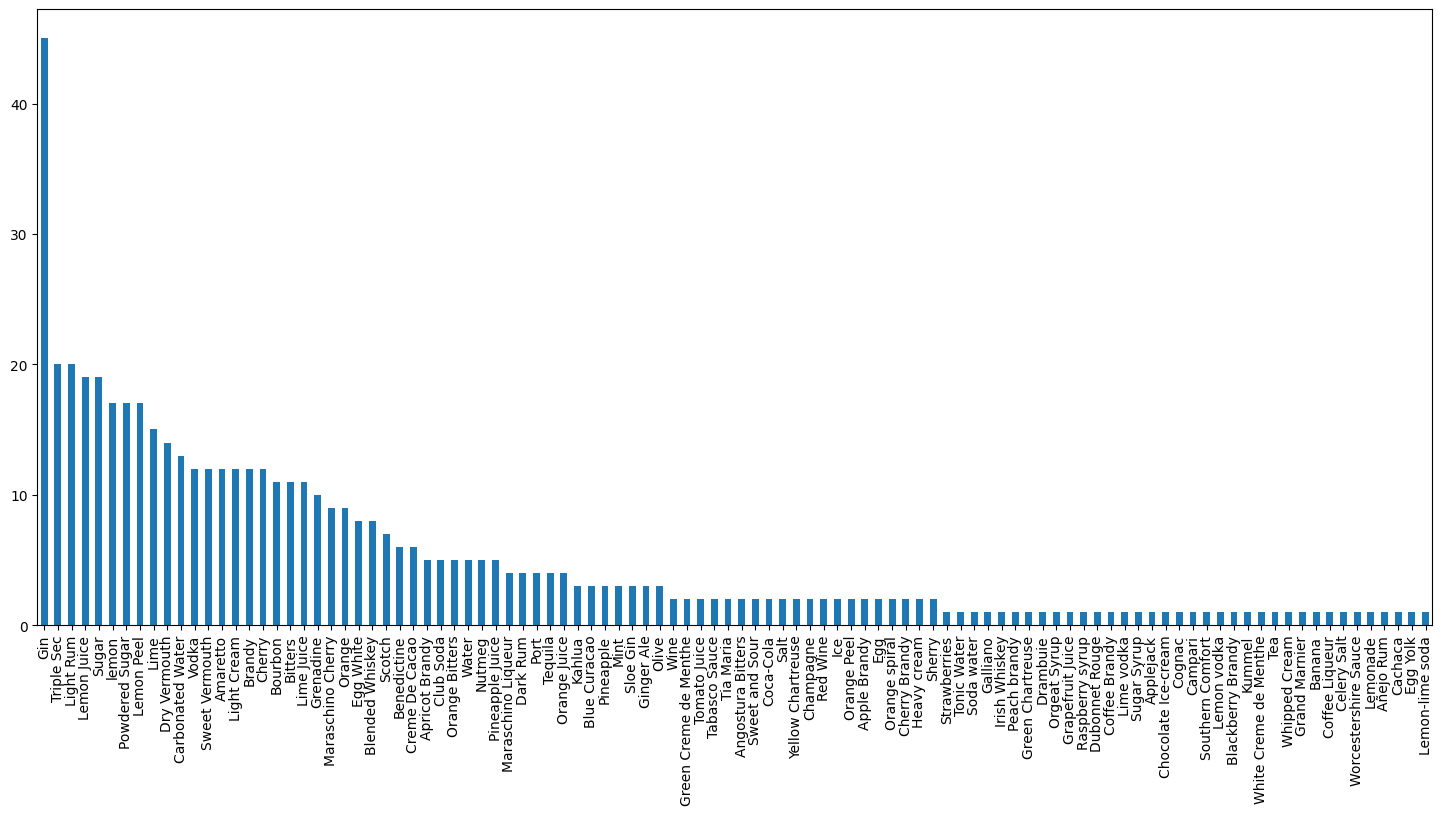

Gin                45
Triple Sec         20
Light Rum          20
Lemon Juice        19
Sugar              19
                   ..
Lemonade            1
Añejo Rum           1
Cachaca             1
Egg Yolk            1
Lemon-lime soda     1
Name: count, Length: 102, dtype: int64


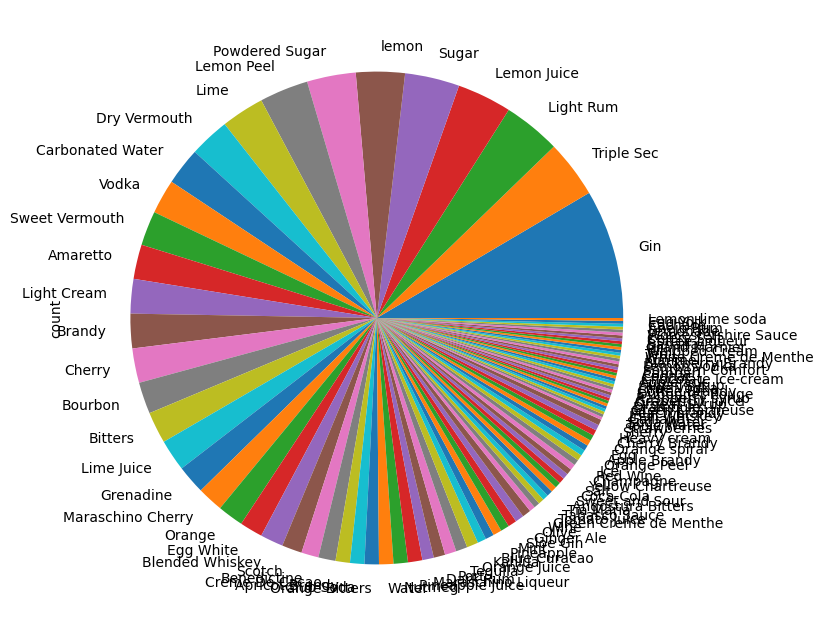

In [13]:
# histogram kolumny - ingredients
ingredients = []
for i in data.ingredients:
    if i:
        for j in i:
            ingredients.append(j['name'])
ingredients = pd.Series(ingredients)
plt.figure(figsize=(18, 8))
ingredients.value_counts().plot(kind='bar')
plt.show()
print(ingredients.value_counts())

plt.figure(figsize=(18, 8))
ingredients.value_counts().plot(kind='pie')
plt.show()


Najczęściej używanym składnikiem jest gin.

Kolejną obserwacją jest wykorzystywanie różnych części limonki i cytryny. Po zsumowaniu ich integralnych części mogłoby się okazać, że cytrusy są numerem 1.

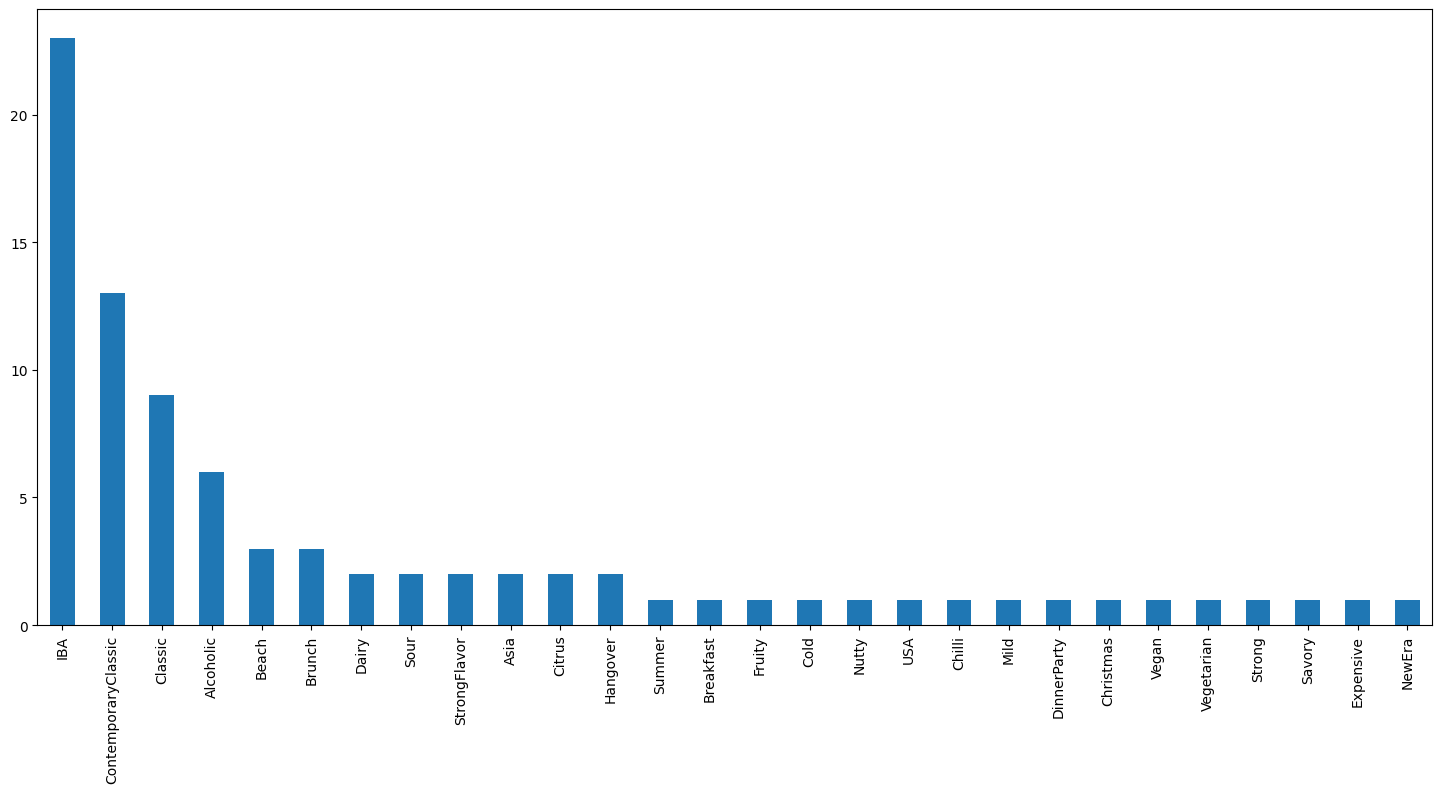

IBA                    23
ContemporaryClassic    13
Classic                 9
Alcoholic               6
Beach                   3
Brunch                  3
Dairy                   2
Sour                    2
StrongFlavor            2
Asia                    2
Citrus                  2
Hangover                2
Summer                  1
Breakfast               1
Fruity                  1
Cold                    1
Nutty                   1
USA                     1
Chilli                  1
Mild                    1
DinnerParty             1
Christmas               1
Vegan                   1
Vegetarian              1
Strong                  1
Savory                  1
Expensive               1
NewEra                  1
Name: count, dtype: int64


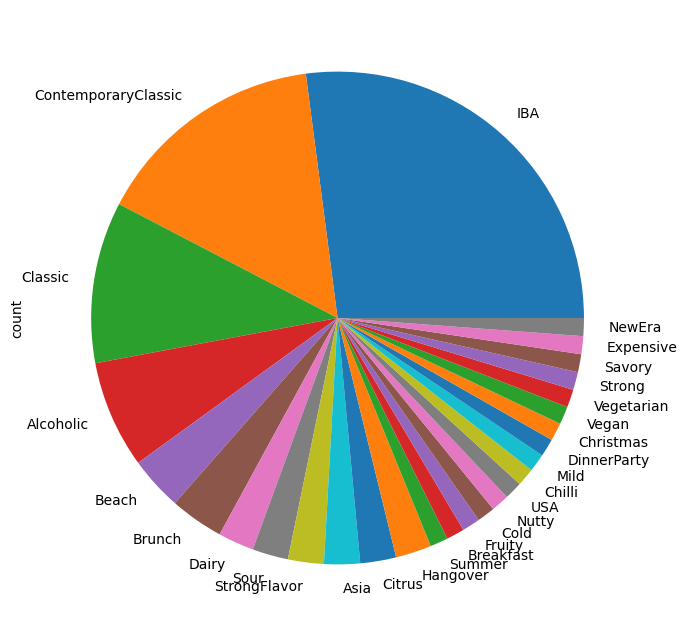

In [14]:
# histogram kolumny - tags i pie chart
tags = []
for i in data.tags:
    if i:
        for j in i:
            tags.append(j)
tags = pd.Series(tags)
plt.figure(figsize=(18, 8))
tags.value_counts().plot(kind='bar')
plt.show()
print(tags.value_counts())

plt.figure(figsize=(18, 8))
tags.value_counts().plot(kind='pie')
plt.show()

Najczęstszym tagiem jest IBA, może to wynikać z tego, że są to certyfikowane a co za tym idzie bardziej dokumentowane drinki, więc większość drinków posiadających tak, posiada tag IBA.

Zweryfikuję to sprawdzająć ile drinków z tagami posiada tag IBA a ile ma tagi ale nie ma IBA.

Drinków z tagami: 35
Drinków z tagiem IBA: 23
Drinków z tagami ale bez IBA: 12


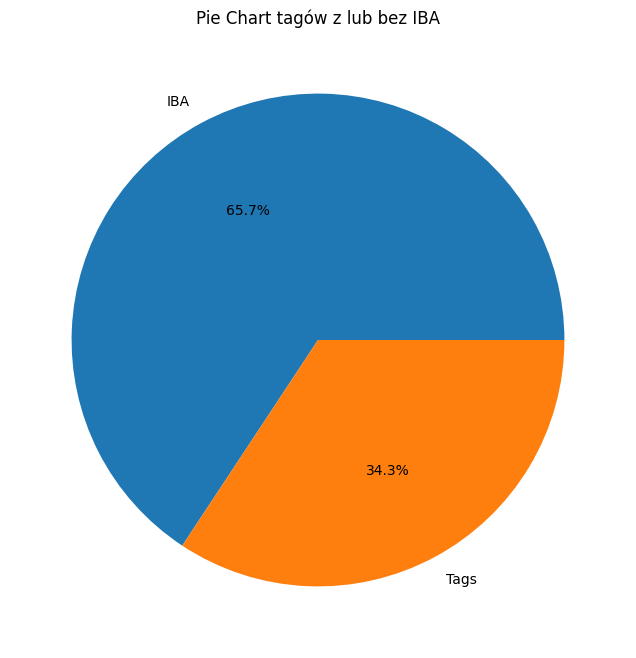

In [15]:
# Zweryfikuję to sprawdzająć ile drinków z tagami posiada tag IBA a ile ma tagi ale nie ma IBA.

IBA = 0
tags = 0
for i in data.tags:
    if i:
        tags += 1
        if "IBA" in i:
            IBA += 1
print(f"Drinków z tagami: {tags}")
print(f"Drinków z tagiem IBA: {IBA}")
print(f"Drinków z tagami ale bez IBA: {tags - IBA}")
# pie chart
plt.figure(figsize=(8, 8))
plt.pie([IBA, tags - IBA], labels=["IBA", "Tags"], autopct='%1.1f%%')
plt.title('Pie Chart tagów z lub bez IBA')
plt.show()


Teoria ta w pewnym stopniu się sprawdza, 2/3 otagowanych drinków pochodzi z bazy IBA.

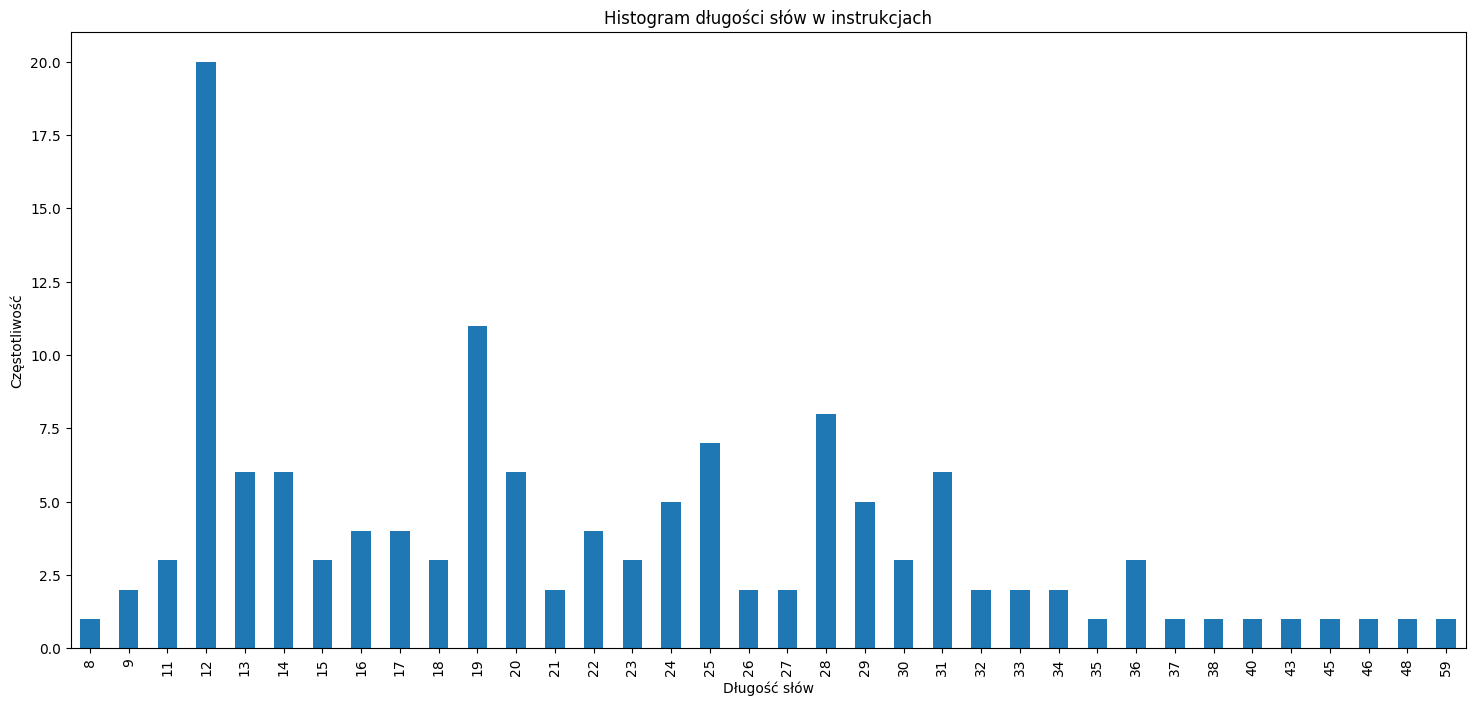

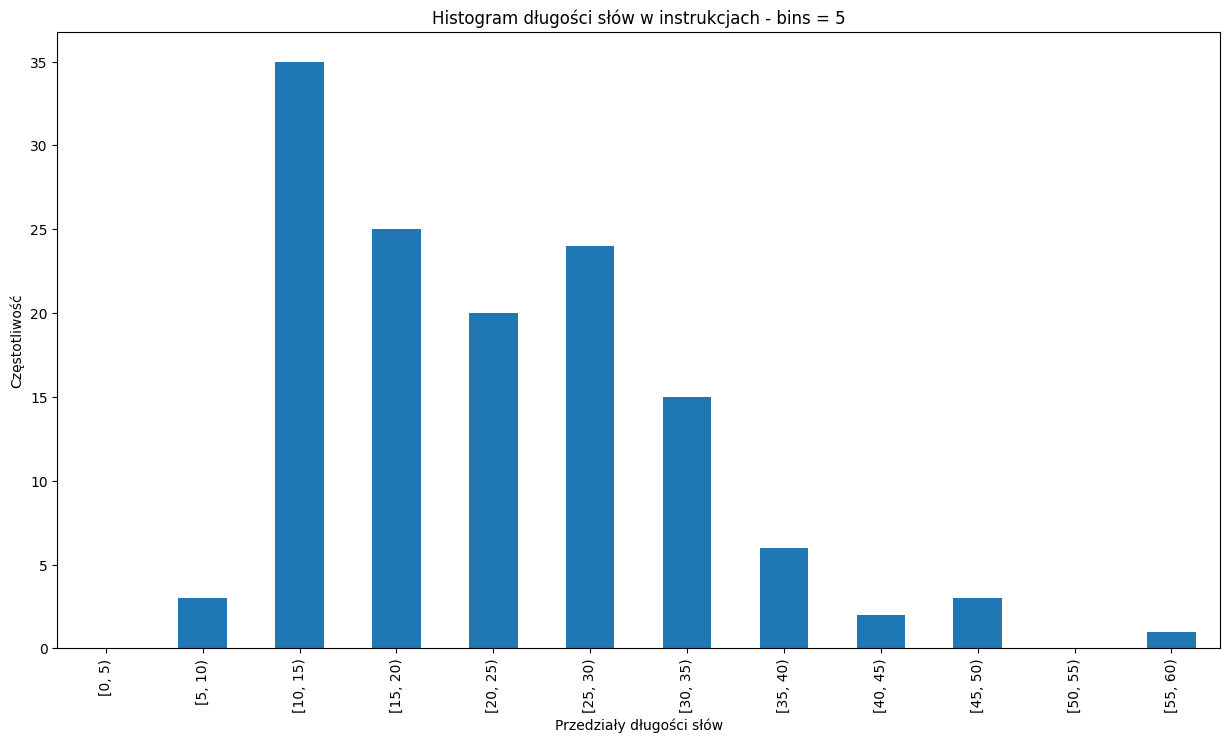

[0, 5)       0
[5, 10)      3
[10, 15)    35
[15, 20)    25
[20, 25)    20
[25, 30)    24
[30, 35)    15
[35, 40)     6
[40, 45)     2
[45, 50)     3
[50, 55)     0
[55, 60)     1
Name: count, dtype: int64


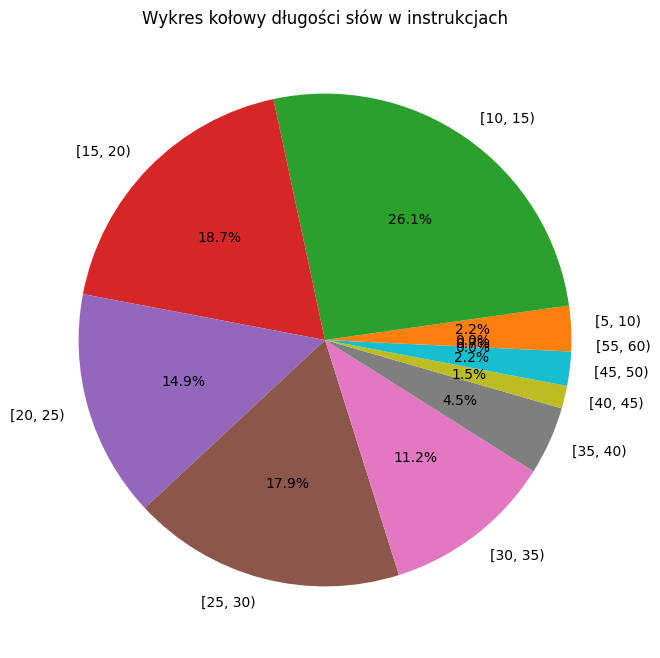

In [24]:
# histogram kolumny - długość słów w instructions
instructions = []
for i in data.instructions:
    if i:
        instructions.append(len(i.split()))
instructions = pd.Series(instructions)

instructions_counts = instructions.value_counts().sort_index()

plt.figure(figsize=(18, 8))
instructions_counts.plot(kind='bar')
plt.title('Histogram długości słów w instrukcjach')
plt.xlabel('Długość słów')
plt.ylabel('Częstotliwość')
plt.show()

bins = range(0, instructions.max() + 5, 5)
binned_instructions = pd.cut(instructions, bins=bins, right=False)

instructions_counts = binned_instructions.value_counts().sort_index()

plt.figure(figsize=(15, 8))
instructions_counts.plot(kind='bar')
plt.title('Histogram długości słów w instrukcjach - bins = 5')
plt.xlabel('Przedziały długości słów')
plt.ylabel('Częstotliwość')
plt.show()

print(instructions_counts)

plt.figure(figsize=(18, 8))
instructions_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Wykres kołowy długości słów w instrukcjach')
plt.ylabel('')  
plt.show()


Najwięcej jest instrukcji 12 - słownych.

Drinków, których składniki znajdują się w nazwie: 34
Drinków, których składniki nie znajdują się w nazwie: 100


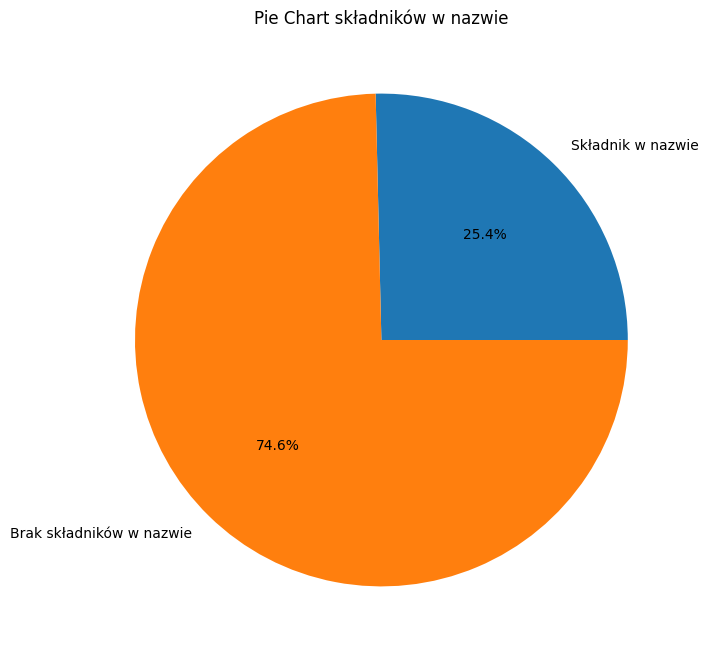

In [29]:
ingredients = []
for i in data.ingredients:
    if i:
        for j in i:
            ingredients.append(j['name'].lower())
ingredients = set(ingredients)

ingredients_in_name = 0
for i in data.name:
    if i:
        for j in ingredients:
            if j in i.lower():
                ingredients_in_name += 1
                break
print(f"Drinków, których składniki znajdują się w nazwie: {ingredients_in_name}")
print(f"Drinków, których składniki nie znajdują się w nazwie: {len(data) - ingredients_in_name}")

plt.figure(figsize=(8, 8))
plt.pie([ingredients_in_name, len(data) - ingredients_in_name], labels=["Składnik w nazwie", "Brak składników w nazwie"], autopct='%1.1f%%')
plt.title('Pie Chart składników w nazwie')
plt.show()


In [38]:
data.updatedAt = pd.to_datetime(data.updatedAt)
data.createdAt = pd.to_datetime(data.createdAt)

print(sum(data.createdAt == data.updatedAt))
data[data.createdAt != data.updatedAt]



129


,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
id,,,,,,,,,,
11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:17+00:00,2024-08-18 19:06:16+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:59+00:00,2024-08-18 19:06:18+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
